In [1]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [11]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import r2_score, mean_absolute_error

In [243]:
from sklearn.linear_model import Ridge,LogisticRegression
ridge_clf = Ridge(alpha=1.0)
ridge_clf_com = Ridge(alpha=1.0)

In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
from matplotlib import pyplot
%matplotlib inline

In [7]:
year = pd.read_csv("../11_hour_merged_data.csv")

In [8]:
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

# transformer = Normalizer().fit(X)
# X_norm = transformer.transform(X)


seed = 7
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [22]:
plot_y_test = [i for i in y_test[0:100]]

### Best parameter search

--------------------------------------------------------------------
#### Best: 100.560582 using {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 150}
--------------------------------------------------------------------
403.375666 (3622.369944) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 5}<br>
292.742762 (2668.271279) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 10}<br>
180.398403 (1554.431484) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 20}<br>
117.130512 (743.940638) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 50}<br>
109.235769 (693.369115) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 100}<br>
107.496887 (717.669566) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150}<br>
106.323813 (730.921640) with: {'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 200}<br>
390.603288 (2905.697916) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 5}<br>
272.998829 (1861.808306) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 10}<br>
156.760936 (980.265131) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 20}<br>
105.593490 (695.887117) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 50}<br>
102.347230 (732.818625) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 100}<br>
101.603126 (735.527638) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 150}<br>
101.250637 (749.657325) with: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 200}<br>
388.350302 (2764.832869) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 5}<br>
269.279846 (1638.913596) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 10}<br>
150.849277 (882.058318) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 20}<br>
102.177936 (802.979796) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 50}<br>
100.601654 (822.977727) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 100}<br>
100.560582 (820.780884) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 150}<br>
100.761670 (810.120693) with: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 200}<br>
387.224721 (2597.856396) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 5}<br>
267.645241 (1511.768958) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 10}<br>
149.252340 (893.846698) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 20}<br>
101.650997 (868.011642) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 50}<br>
101.008937 (818.847810) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 100}<br>
101.250324 (762.541004) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 150}<br>
101.606143 (771.316959) with: {'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 200}<br>
387.291930 (2658.742044) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 5}<br>
267.762368 (1580.724528) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 10}<br>
149.522068 (895.774230) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 20}<br>
103.239083 (888.807353) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 50}<br>
103.121203 (833.739309) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 100}<br>
103.421848 (842.167684) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 150}<br>
103.851692 (856.838199) with: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 200}<br>

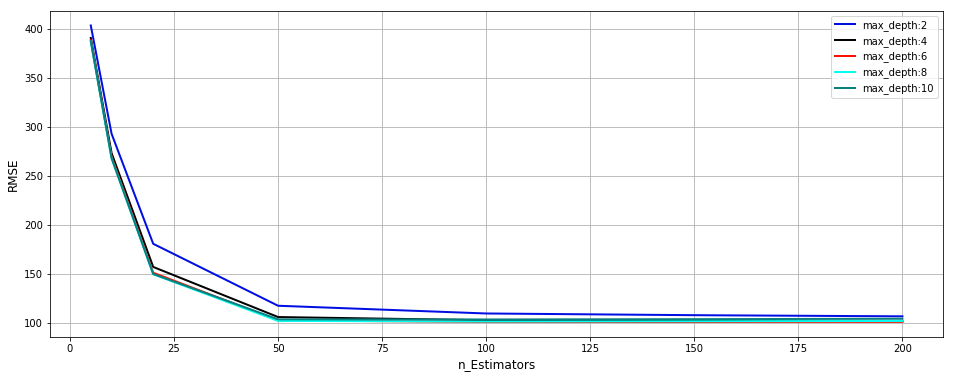

In [67]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(n_estimators, score[2] ,linewidth=2, color='#000EE3', label="max_depth:2")
ax.plot(n_estimators, score[4] , linewidth=2, color='#000000', label="max_depth:4")
ax.plot(n_estimators, score[6] , linewidth=2, color='#FF0F00', label="max_depth:6")
ax.plot(n_estimators, score[8] , linewidth=2, color='#00FFF0', label="max_depth:8")
ax.plot(n_estimators, score[10] , linewidth=2, color='#088080', label="max_depth:10")
ax.grid(True)
ax.legend(loc='upper right',)
plt.xlabel('n_Estimators', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.show()

### Simple XGboost results

In [48]:
clf = XGBRegressor(max_depth=6, learning_rate=0.08, n_estimators=150)
clf.fit(X_train,y_train)
predictinos = clf.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
    
out_put_r = r2_score(y_test, predictinos)
out_put_mae = mean_absolute_error(y_test, predictinos)
out_put_mape = mean_absolute_percentage_error(predictinos,y_test)

print("testing [RSME] error for best xgboost model: " +str(math.sqrt(squared_sum/len(y_test))))
print("[R2] error for combined with feature: "+str(out_put_r))
print("[MAE] error for combined with feature: "+str(out_put_mae))
print("[MAPE] error for combined with feature: "+str(out_put_mape))

testing [RSME] error for best xgboost model: 95.11689997012226
[R2] error for combined with feature: 0.8832615469020946
[MAE] error for combined with feature: 59.32411400932353
[MAPE] error for combined with feature: 17.23133979671943


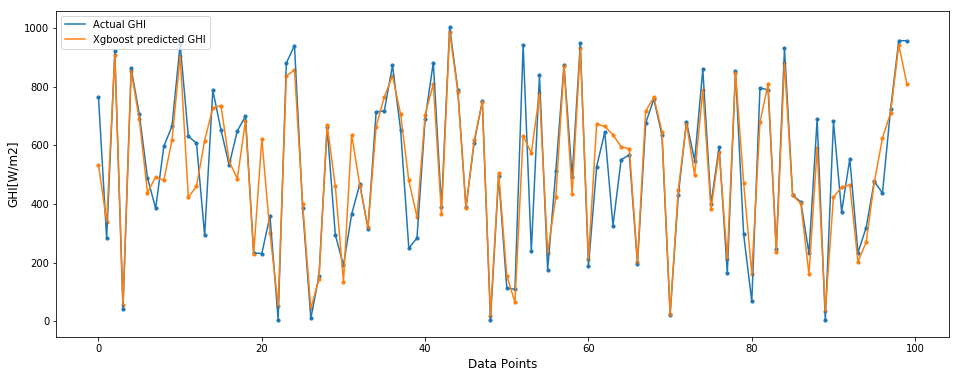

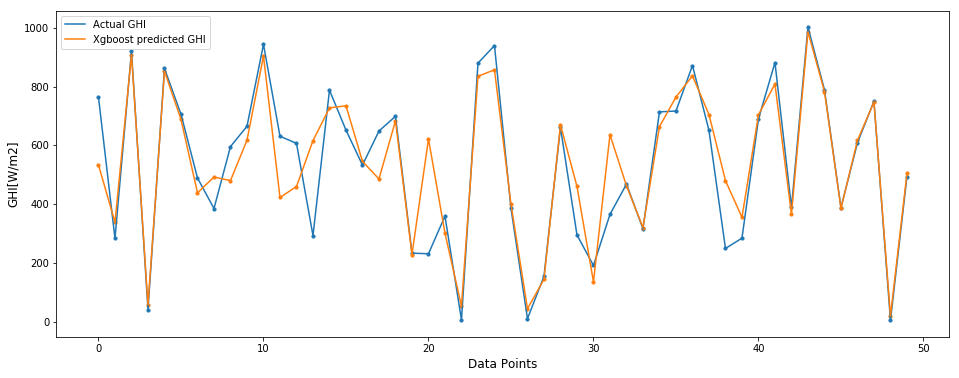

In [68]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(plot_y_test,linewidth=1.5,label="Actual GHI")
ax.scatter([x for x in range(100)],plot_y_test,s=10)
ax.plot(predictinos[0:100],linewidth=1.5,label="Xgboost predicted GHI")
ax.scatter([x for x in range(100)],predictinos[0:100],s=10)
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

#for 50 points

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(plot_y_test[0:50],linewidth=1.5,label="Actual GHI")
ax.scatter([x for x in range(50)],plot_y_test[0:50],s=10)
ax.plot(predictinos[0:50],linewidth=1.5,label="Xgboost predicted GHI")
ax.scatter([x for x in range(50)],predictinos[0:50],s=10)
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

### Best Xgboost Forest results

D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'xgb_1': 116.69045453106425, 'xgb_2': 100.49312602290152, 'xgb_3': 95.18897249388, 'xgb_4': 95.03071652153803, 'xgb_5': 96.04924587731696, 'xgb_6': 97.85031659701696, 'xgb_7': 98.37430736569176, 'xgb_8': 99.25101057639664, 'xgb_9': 99.93990214292465, 'xgb_10': 97.13913266858698, 'xgb_11': 98.94997466876814, 'xgb_12': 99.31102708367773}
-------------------------------------------------------------------
forest RMSE: 7.243175662812796
forest [R2] error  0.9993153040996557
forest [MAE] error: 4.322769989404687
forest [MAPE] error : 2.683527142284894


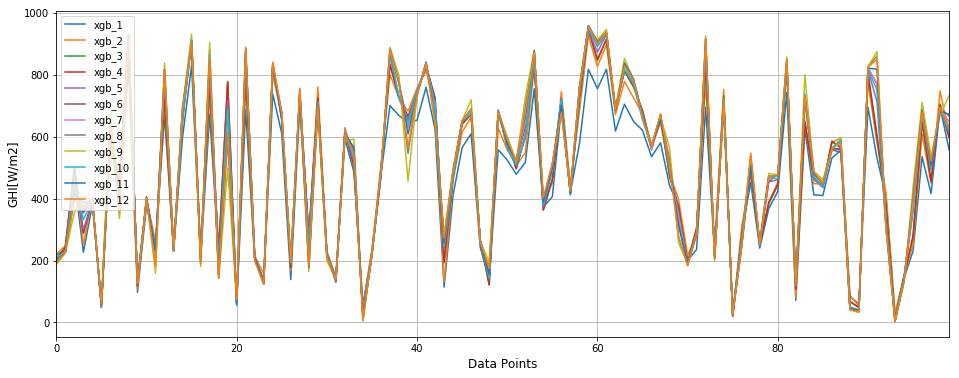

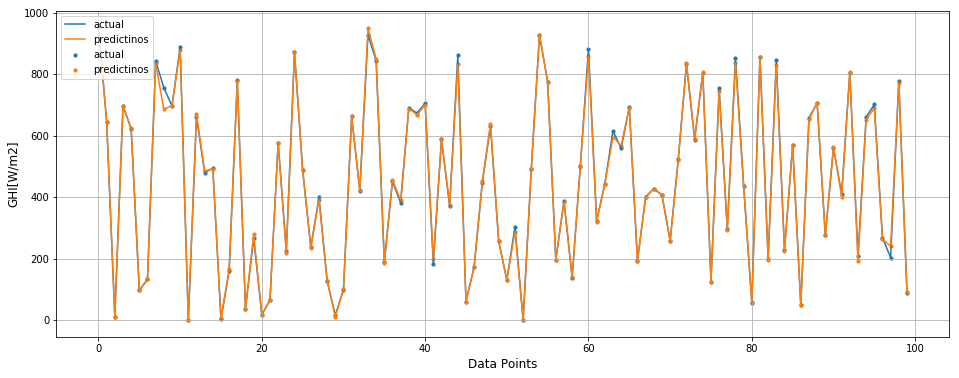

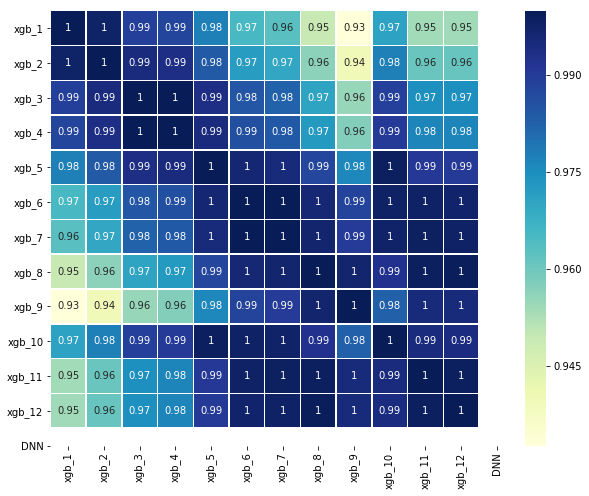

In [251]:
## Models which are highly correlated


xgb_1 = XGBRegressor(learning_rate=0.08,max_depth=4,n_estimators=30)
xgb_2 = XGBRegressor(learning_rate=0.08,max_depth=4,n_estimators=60)
xgb_3 = XGBRegressor(learning_rate=0.08,max_depth=6,n_estimators=80)
xgb_4 = XGBRegressor(learning_rate=0.08,max_depth=6,n_estimators=100)
xgb_5 = XGBRegressor(learning_rate=0.08,max_depth=8,n_estimators=130)
xgb_6 = XGBRegressor(learning_rate=0.08,max_depth=10,n_estimators=150)
xgb_7 = XGBRegressor(learning_rate=0.08,max_depth=10,n_estimators=180)
xgb_8 = XGBRegressor(learning_rate=0.08,max_depth=12,n_estimators=200)
xgb_9 = XGBRegressor(learning_rate=0.08,max_depth=15,n_estimators=250)
xgb_10 = XGBRegressor(learning_rate=0.08,max_depth=8,n_estimators=220)
xgb_11 = XGBRegressor(learning_rate=0.08,max_depth=10,n_estimators=300)
xgb_12 = XGBRegressor(learning_rate=0.08,max_depth=12,n_estimators=150)

xgb_1.fit(X_train,y_train)
xgb_2.fit(X_train,y_train)
xgb_3.fit(X_train,y_train)
xgb_4.fit(X_train,y_train)
xgb_5.fit(X_train,y_train)
xgb_6.fit(X_train,y_train)
xgb_7.fit(X_train,y_train)
xgb_8.fit(X_train,y_train)
xgb_9.fit(X_train,y_train)
xgb_10.fit(X_train,y_train)
xgb_11.fit(X_train,y_train)
xgb_12.fit(X_train,y_train)

predicted_xgb_1 = xgb_1.predict(X_train)
predicted_xgb_2 = xgb_2.predict(X_train)
predicted_xgb_3 = xgb_3.predict(X_train)
predicted_xgb_4 = xgb_4.predict(X_train)
predicted_xgb_5 = xgb_5.predict(X_train)
predicted_xgb_6 = xgb_6.predict(X_train)
predicted_xgb_7 = xgb_7.predict(X_train)
predicted_xgb_8 = xgb_8.predict(X_train)
predicted_xgb_9 = xgb_9.predict(X_train)
predicted_xgb_10 = xgb_10.predict(X_train)
predicted_xgb_11 = xgb_11.predict(X_train)
predicted_xgb_12 = xgb_12.predict(X_train)


#######################################
#Visulising the different trees
####################################

# plot_tree(xgb_1,num_trees=0, rankdir='LR')
# plt.show()

score = {}
models = [xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9,xgb_10,xgb_11,xgb_12]
for counter1,model in enumerate(models):
    predictinos = model.predict(X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-predictinos[counter])**2
    score["xgb_"+str(counter1+1)] = (math.sqrt(squared_sum/len(y_test)))  
print(score)


df_pred1 = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
})
X_train_, X_test_, y_train_, y_test_ = train_test_split(df_pred1, y_train, test_size=test_size, random_state=seed)

ridge_clf.fit(X_train_,y_train_)

predictinos = ridge_clf.predict(X_test_)
squared_sum = 0
for counter,i in enumerate(y_test_):
    squared_sum += ((i)-predictinos[counter])**2
    
out_put_r = r2_score(y_test_, predictinos)
out_put_mae = mean_absolute_error(y_test_, predictinos)
out_put_mape = mean_absolute_percentage_error(predictinos,y_test_)
print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test_))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))

min_x_test = y_test_[0:100]
predictinos = ridge_clf.predict(X_test_)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
df_plot = df_pred1[0:100]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test,linewidth=1.5,label="actual")
ax.scatter(x,original_y_test,s=10,label="actual")
ax.plot(predictinos,linewidth=1.5,label="predictinos")
ax.scatter(x,predictinos,s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

fig2, ax2 = pyplot.subplots(figsize=(10,8))
corr_hm = sns.heatmap(ax=ax2,
                data = df_pred1.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

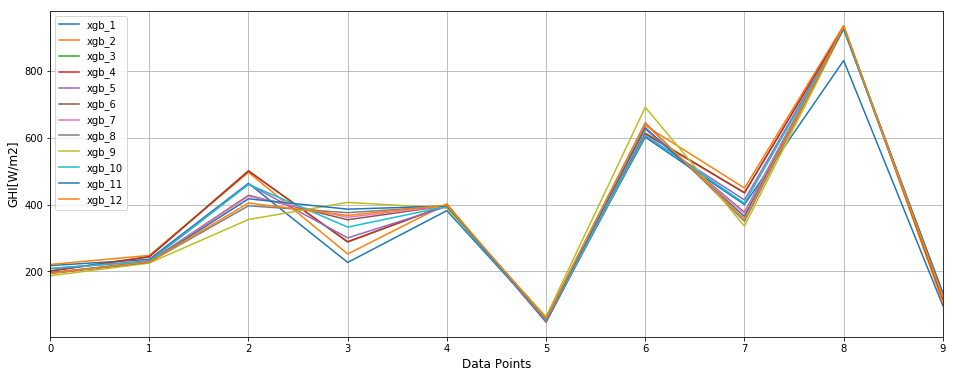

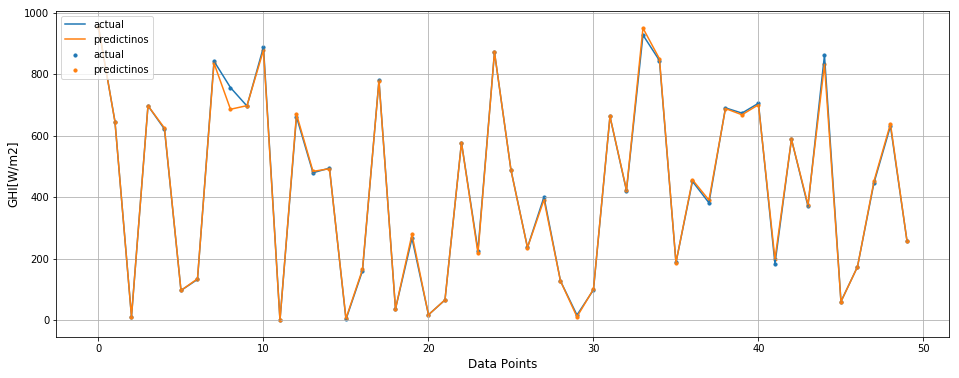

In [73]:
### 50 point plot for above
df_plot = df_pred[0:10]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test[0:50],linewidth=1.5,label="actual")
ax.scatter(x[0:50],original_y_test[0:50],s=10,label="actual")
ax.plot(predictinos[0:50],linewidth=1.5,label="predictinos")
ax.scatter(x[0:50],predictinos[0:50],s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'xgb_1': 116.69045453106425, 'xgb_2': 102.86987302678281, 'xgb_3': 95.18897249388, 'xgb_4': 101.1014563069059, 'xgb_5': 283.63744562514086, 'xgb_6': 97.85031659701696, 'xgb_7': 106.15237653828815, 'xgb_8': 148.81272207168044, 'xgb_9': 101.32788546890959, 'xgb_10': 97.13913266858698, 'xgb_11': 102.7821025514752, 'xgb_12': 391.7946721760913}
-------------------------------------------------------------------
forest RMSE: 14.024455568400066
forest [R2] error  0.9974330836665501
forest [MAE] error: 8.645532814728467
forest [MAPE] error : 14.848934451424078


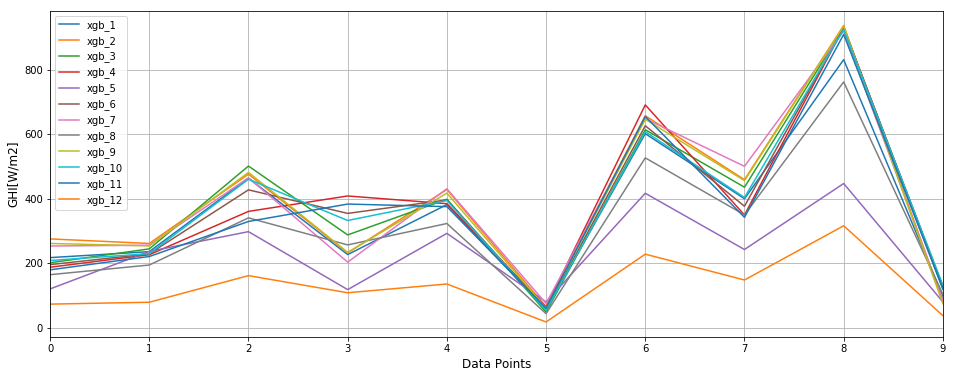

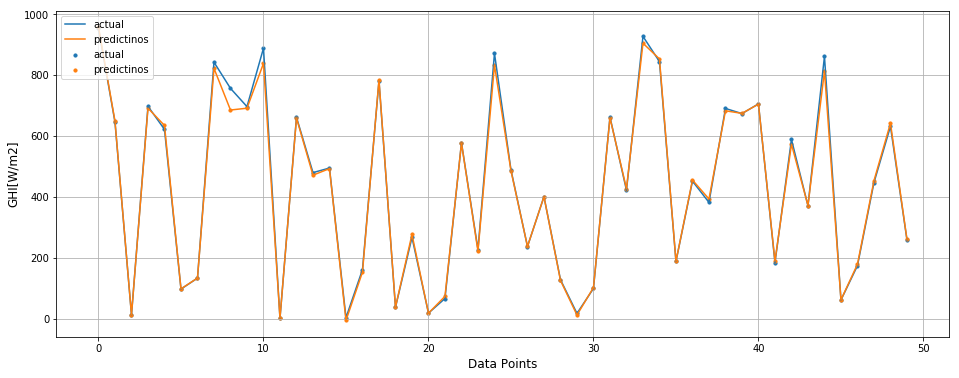

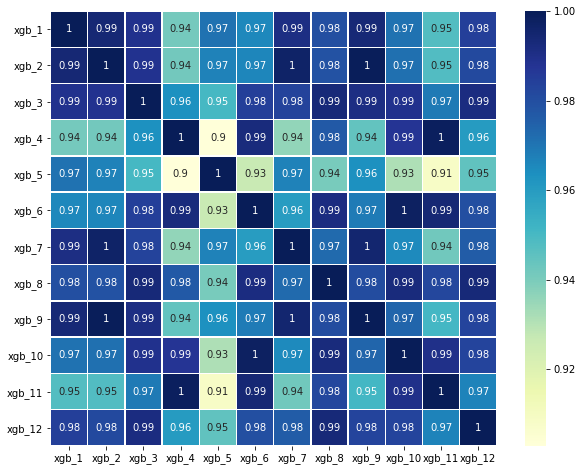

In [83]:
## Models which are less correlated


xgb_1 = XGBRegressor(learning_rate=0.08,max_depth=4,n_estimators=30)
xgb_2 = XGBRegressor(learning_rate=0.08,max_depth=2,n_estimators=160)
xgb_3 = XGBRegressor(learning_rate=0.08,max_depth=6,n_estimators=80)
xgb_4 = XGBRegressor(learning_rate=0.08,max_depth=16,n_estimators=100)
xgb_5 = XGBRegressor(learning_rate=0.08,max_depth=3,n_estimators=10)
xgb_6 = XGBRegressor(learning_rate=0.08,max_depth=10,n_estimators=150)
xgb_7 = XGBRegressor(learning_rate=0.08,max_depth=1,n_estimators=450)
xgb_8 = XGBRegressor(learning_rate=0.08,max_depth=12,n_estimators=20)
xgb_9 = XGBRegressor(learning_rate=0.08,max_depth=2,n_estimators=250)
xgb_10 = XGBRegressor(learning_rate=0.08,max_depth=8,n_estimators=220)
xgb_11 = XGBRegressor(learning_rate=0.08,max_depth=20,n_estimators=40)
xgb_12 = XGBRegressor(learning_rate=0.08,max_depth=12,n_estimators=5)

xgb_1.fit(X_train,y_train)
xgb_2.fit(X_train,y_train)
xgb_3.fit(X_train,y_train)
xgb_4.fit(X_train,y_train)
xgb_5.fit(X_train,y_train)
xgb_6.fit(X_train,y_train)
xgb_7.fit(X_train,y_train)
xgb_8.fit(X_train,y_train)
xgb_9.fit(X_train,y_train)
xgb_10.fit(X_train,y_train)
xgb_11.fit(X_train,y_train)
xgb_12.fit(X_train,y_train)

predicted_xgb_1 = xgb_1.predict(X_train)
predicted_xgb_2 = xgb_2.predict(X_train)
predicted_xgb_3 = xgb_3.predict(X_train)
predicted_xgb_4 = xgb_4.predict(X_train)
predicted_xgb_5 = xgb_5.predict(X_train)
predicted_xgb_6 = xgb_6.predict(X_train)
predicted_xgb_7 = xgb_7.predict(X_train)
predicted_xgb_8 = xgb_8.predict(X_train)
predicted_xgb_9 = xgb_9.predict(X_train)
predicted_xgb_10 = xgb_10.predict(X_train)
predicted_xgb_11 = xgb_11.predict(X_train)
predicted_xgb_12 = xgb_12.predict(X_train)


#######################################
#Visulising the different trees
####################################

# plot_tree(xgb_1,num_trees=0, rankdir='LR')
# plt.show()

score = {}
models = [xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9,xgb_10,xgb_11,xgb_12]
for counter1,model in enumerate(models):
    predictinos = model.predict(X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-predictinos[counter])**2
    score["xgb_"+str(counter1+1)] = (math.sqrt(squared_sum/len(y_test)))  
print(score)


df_pred = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
})
X_train_, X_test_, y_train_, y_test_ = train_test_split(df_pred, y_train, test_size=test_size, random_state=seed)

ridge_clf.fit(X_train_,y_train_)

predictinos = ridge_clf.predict(X_test_)
squared_sum = 0
for counter,i in enumerate(y_test_):
    squared_sum += ((i)-predictinos[counter])**2

out_put_r = r2_score(y_test_, predictinos)
out_put_mae = mean_absolute_error(y_test_, predictinos)
out_put_mape = mean_absolute_percentage_error(predictinos,y_test_)
print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test_))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))

min_x_test = y_test_[0:100]
predictinos = ridge_clf.predict(X_test_)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
### 50 point plot for above
df_plot = df_pred[0:10]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test[0:50],linewidth=1.5,label="actual")
ax.scatter(x[0:50],original_y_test[0:50],s=10,label="actual")
ax.plot(predictinos[0:50],linewidth=1.5,label="predictinos")
ax.scatter(x[0:50],predictinos[0:50],s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

fig2, ax2 = pyplot.subplots(figsize=(10,8))
corr_hm = sns.heatmap(ax=ax2,
                data = df_pred.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

### best Dnn

In [84]:
from keras.callbacks import ModelCheckpoint,CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

Using TensorFlow backend.


In [100]:
transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)

X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(X_norm, Y, test_size=test_size, random_state=seed)

NN_model_1 = Sequential()

# The Input Layer :
NN_model_1.add(Dense(32, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_1.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dropout(0.2, noise_shape=None, seed=None))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total para

In [106]:
# Compile the network :
NN_model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
csv_logger = CSVLogger('NN_model_archi3.log')
history = NN_model_1.fit(X_train_dnn, y_train_dnn, verbose=0, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


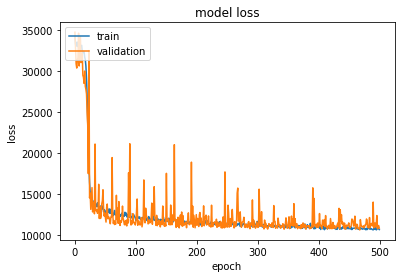

In [107]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [108]:
output = NN_model_1.predict(X_test_dnn)
output_dnn_ = [i[0] for i in output]
squared_sum = 0
for counter,i in enumerate(y_test_dnn):
    squared_sum += ((i)-output[counter])**2
    
out_put_r = r2_score(y_test, output_dnn_)
out_put_mae = mean_absolute_error(y_test, output_dnn_)
out_put_mape = mean_absolute_percentage_error(output_dnn_,y_test)

print("[RSME] for best DNN model: " +str(math.sqrt(squared_sum/len(y_test))))
print("[R2] error: "+str(out_put_r))
print("[MAE] error: "+str(out_put_mae))
print("[MAPE] error: "+str(out_put_mape))

[RSME] for best DNN model: 99.60618744899837
[R2] error: 0.8719819705490494
[MAE] error: 65.6155829085211
[MAPE] error: 18.3977390968107


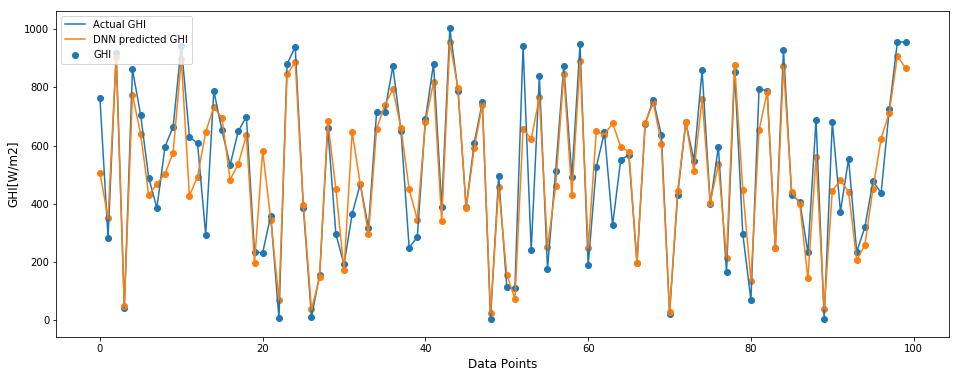

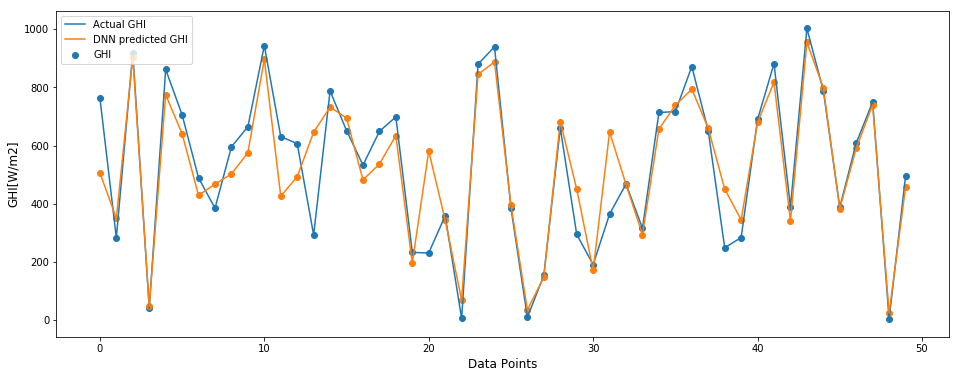

In [109]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot([x for x in range(100)],y_test[0:100],linewidth=1.5,label="Actual GHI")
ax.scatter([x for x in range(100)],y_test[0:100])
ax.plot([x for x in range(100)],output[0:100],linewidth=1.5,label="DNN predicted GHI")
ax.scatter([x for x in range(100)],output[0:100])
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

fig, ax = plt.subplots(figsize=(16,6))
ax.plot([x for x in range(50)],y_test[0:50],linewidth=1.5,label="Actual GHI")
ax.scatter([x for x in range(50)],y_test[0:50])
ax.plot([x for x in range(50)],output[0:50],linewidth=1.5,label="DNN predicted GHI")
ax.scatter([x for x in range(50)],output[0:50])
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

### Xgboost forest and dnn together without feature selection

-------------------------------------------------------------------
forest RMSE: 7.2434404078094
forest [R2] error  0.9993152540461612
forest [MAE] error: 4.3238381782412825
forest [MAPE] error : 2.62248726018999


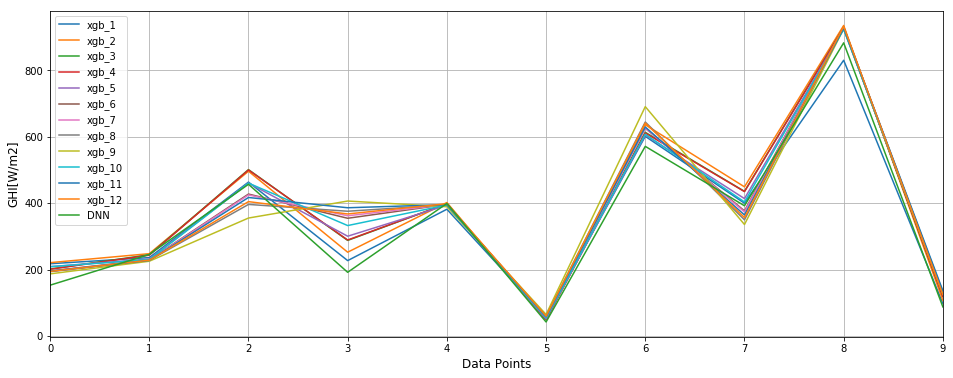

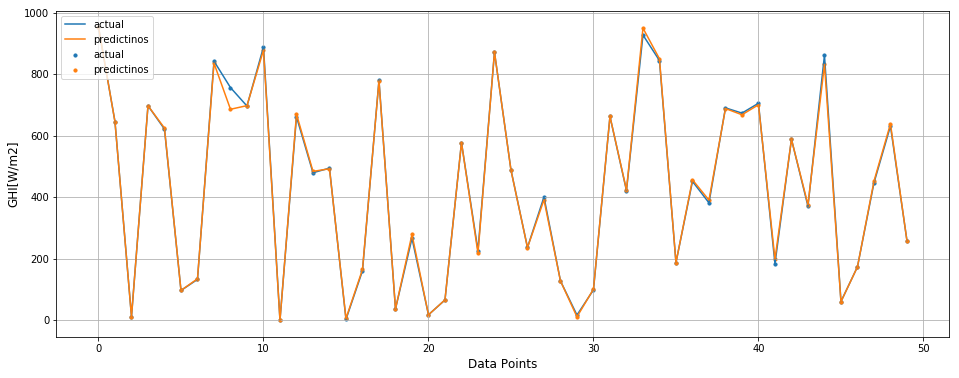

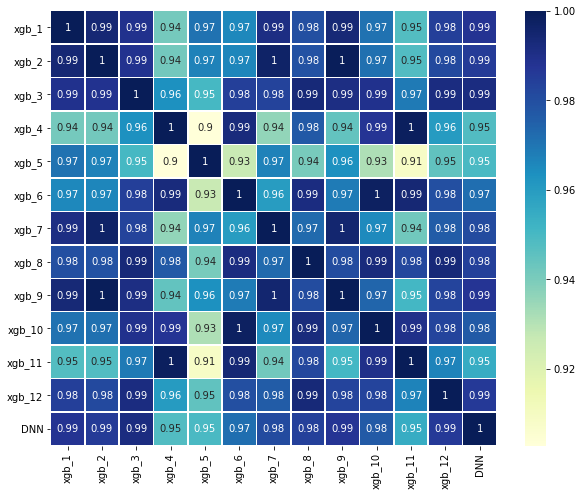

In [245]:
dnn_predicted = NN_model_1.predict(X_train_dnn)
df_pred1['DNN'] = dnn_predicted

# transformer = Normalizer().fit(df_pred1)
# df_pred1_norm = transformer.transform(df_pred1)

X_train__, X_test__, y_train__, y_test__ = train_test_split(df_pred1, y_train, test_size=test_size, random_state=seed)

ridge_clf_com.fit(X_train__,y_train__)

predictinos = ridge_clf_com.predict(X_test__)
squared_sum = 0
for counter,i in enumerate(y_test__):
    squared_sum += ((i)-predictinos[counter])**2

out_put_r = r2_score(y_test__, predictinos)
out_put_mae = mean_absolute_error(y_test__, predictinos)
out_put_mape = mean_absolute_percentage_error(predictinos,y_test__)
print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test__))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))

min_x_test = y_test__[0:100]
predictinos = ridge_clf_com.predict(X_test__)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
### 50 point plot for above
df_plot = df_pred1[0:10]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test[0:50],linewidth=1.5,label="actual")
ax.scatter(x[0:50],original_y_test[0:50],s=10,label="actual")
ax.plot(predictinos[0:50],linewidth=1.5,label="predictinos")
ax.scatter(x[0:50],predictinos[0:50],s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

fig2, ax2 = pyplot.subplots(figsize=(10,8))
corr_hm = sns.heatmap(ax=ax2,
                data = df_pred.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

## Xgboost and Dnn with feature selection

In [128]:
from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(clf.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = XGBRegressor(max_depth=6, learning_rate=0.08, n_estimators=150)
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-y_pred[counter])**2
    print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))
    
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, RMSE: %.4f" % (thresh, select_X_train.shape[1], math.sqrt(squared_sum/len(y_test))))

D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 95.11689997012226
Thresh=0.014, n=5, RMSE: 95.1169


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 97.00304099445269
Thresh=0.025, n=4, RMSE: 97.0030


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 100.42011599586368
Thresh=0.025, n=3, RMSE: 100.4201


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 107.59832798693509
Thresh=0.336, n=2, RMSE: 107.5983


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 143.51424355923467
Thresh=0.600, n=1, RMSE: 143.5142


In [129]:
thresholds

array([0.01426541, 0.0246444 , 0.02544276, 0.33611694, 0.59953046],
      dtype=float32)

In [134]:
feature_thres = 0.01426541
selection = SelectFromModel(clf, threshold=0.01426541, prefit=True)
select_X_train = selection.transform(X_train_dnn)

In [135]:
history_feature_selection = NN_model_1.fit(select_X_train, y_train_dnn, verbose=0, epochs=150, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])

In [137]:
select_X_test = selection.transform(X_test_dnn)
output_dnn = NN_model_1.predict(select_X_test)
squared_sum = 0
for counter,i in enumerate(y_test_dnn):
    squared_sum += ((i)-output_dnn[counter])**2
print("DNN: " + str(math.sqrt(squared_sum/len(y_test_dnn))))

DNN: 106.78938456724057


### SVR 

In [149]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [142]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_model = svr_rbf.fit(X_train_dnn,y_train_dnn)

In [154]:
predictions = svr_rbf.predict(X_test_dnn)
squared_sum = 0
for counter,i in enumerate(y_test_dnn):
    squared_sum += ((i)-predictions[counter])**2

out_put_r = r2_score(y_test_dnn, predictions)
out_put_mae = mean_absolute_error(y_test_dnn, predictions)
out_put_mape = mean_absolute_percentage_error(predictions,y_test_dnn)

print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test_dnn))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))  

-------------------------------------------------------------------
forest RMSE: 260.3473891181069
forest [R2] error  0.12540898206381945
forest [MAE] error: 223.09337434415716
forest [MAPE] error : 43.68049897595777


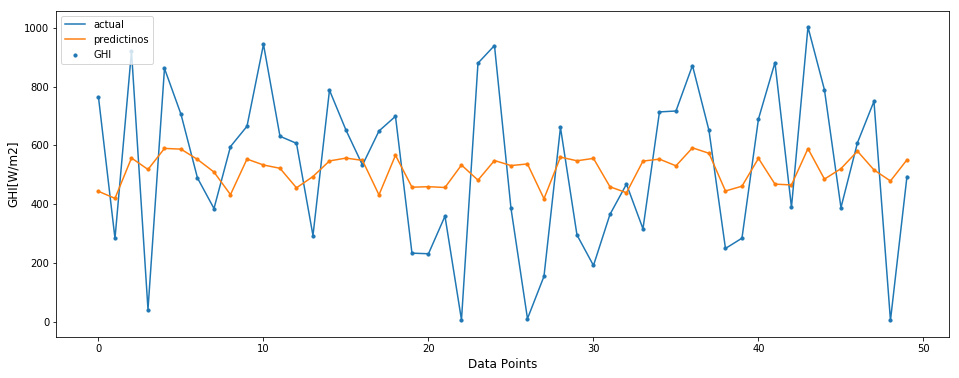

In [160]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot([x for x in range(50)],y_test_dnn[0:50],linewidth=1.5,label="actual")
ax.scatter([x for x in range(50)],y_test_dnn[0:50],s=10)
ax.plot(predictions[0:50],linewidth=1.5,label="predictinos")
ax.scatter([x for x in range(50)],predictions[0:50],s=10)
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

### Random Forest

In [161]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(X_train_dnn,y_train_dnn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

-------------------------------------------------------------------
forest RMSE: 196.57347102063292
forest [R2] error  0.5014044798921968
forest [MAE] error: 158.63227814502653
forest [MAPE] error : 34.83851401777229


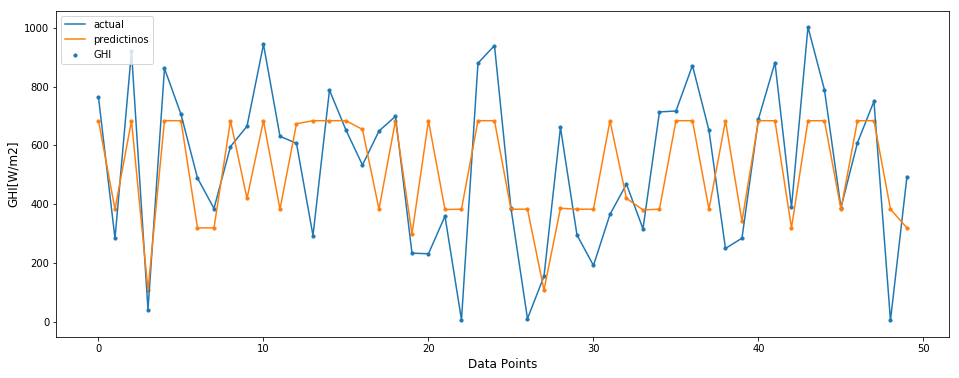

In [162]:
predictions_rf = regr.predict(X_test_dnn)
squared_sum = 0
for counter,i in enumerate(y_test_dnn):
    squared_sum += ((i)-predictions_rf[counter])**2

out_put_r = r2_score(y_test_dnn, predictions_rf)
out_put_mae = mean_absolute_error(y_test_dnn, predictions_rf)
out_put_mape = mean_absolute_percentage_error(predictions_rf,y_test_dnn)

print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test_dnn))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))   
    

fig, ax = plt.subplots(figsize=(16,6))
ax.plot([x for x in range(50)],y_test_dnn[0:50],linewidth=1.5,label="actual")
ax.scatter([x for x in range(50)],y_test_dnn[0:50],s=10)
ax.plot(predictions_rf[0:50],linewidth=1.5,label="predictinos")
ax.scatter([x for x in range(50)],predictions_rf[0:50],s=10)
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()


### Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_dnn,y_train_dnn)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

-------------------------------------------------------------------
forest RMSE: 199.11003535954416
forest [R2] error  0.4884538053507592
forest [MAE] error: 163.4682098966071
forest [MAPE] error : 37.26320248136752


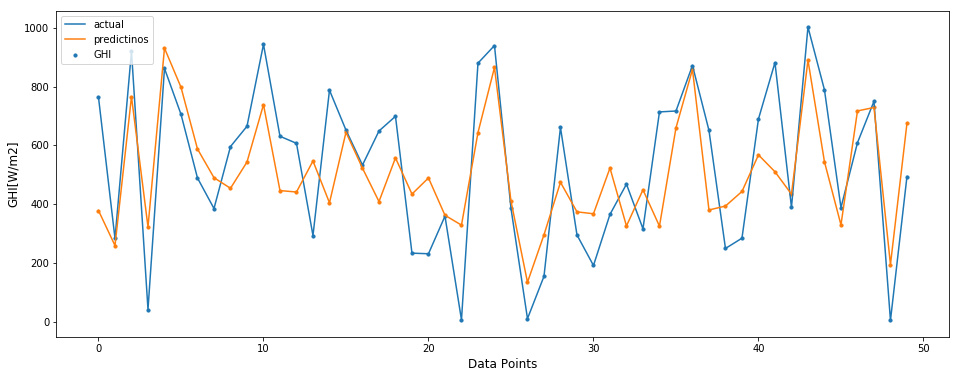

In [165]:
predictions_rf = linear_reg.predict(X_test_dnn)
squared_sum = 0
for counter,i in enumerate(y_test_dnn):
    squared_sum += ((i)-predictions_rf[counter])**2

out_put_r = r2_score(y_test_dnn, predictions_rf)
out_put_mae = mean_absolute_error(y_test_dnn, predictions_rf)
out_put_mape = mean_absolute_percentage_error(predictions_rf,y_test_dnn)

print("-------------------------------------------------------------------")
print("forest RMSE: " + str(math.sqrt(squared_sum/len(y_test_dnn))))
print("forest [R2] error  "+str(out_put_r))
print("forest [MAE] error: "+str(out_put_mae))
print("forest [MAPE] error : "+str(out_put_mape))   
    

fig, ax = plt.subplots(figsize=(16,6))
ax.plot([x for x in range(50)],y_test_dnn[0:50],linewidth=1.5,label="actual")
ax.scatter([x for x in range(50)],y_test_dnn[0:50],s=10)
ax.plot(predictions_rf[0:50],linewidth=1.5,label="predictinos")
ax.scatter([x for x in range(50)],predictions_rf[0:50],s=10)
ax.grid(False)
ax.legend(loc='upper left',)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
plt.show()

### Data analysis and plots

In [255]:
x_time_plot = X[0:100]
y_time_plot = Y[0:100]

transformer = Normalizer().fit(x_time_plot)
x_time_plot_norm = transformer.transform(x_time_plot)

x_plot_linear_reg = linear_reg.predict(x_time_plot_norm)
x_plot_svr = svr_rbf.predict(x_time_plot_norm)
x_plot_rf = regr.predict(x_time_plot_norm)

x_plot_xgb = clf.predict(x_time_plot)


## for xgbforest
predicted_xgb_1 = xgb_1.predict(x_time_plot)
predicted_xgb_2 = xgb_2.predict(x_time_plot)
predicted_xgb_3 = xgb_3.predict(x_time_plot)
predicted_xgb_4 = xgb_4.predict(x_time_plot)
predicted_xgb_5 = xgb_5.predict(x_time_plot)
predicted_xgb_6 = xgb_6.predict(x_time_plot)
predicted_xgb_7 = xgb_7.predict(x_time_plot)
predicted_xgb_8 = xgb_8.predict(x_time_plot)
predicted_xgb_9 = xgb_9.predict(x_time_plot)
predicted_xgb_10 = xgb_10.predict(x_time_plot)
predicted_xgb_11 = xgb_11.predict(x_time_plot)
predicted_xgb_12 = xgb_12.predict(x_time_plot)
dnn_pred_plot = NN_model_1.predict(x_time_plot_norm)

xgb_forest_pred_df = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
})

xgb_forest_pred_df_com = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
    'Dnn':[x[0] for x in dnn_pred_plot]
})
x_plot_xgb_forest = ridge_clf.predict(xgb_forest_pred_df)

##DNN predict

x_plot_dnn = NN_model_1.predict(x_time_plot_norm)
x_plot_dnn_ = [x[0] for x in x_plot_dnn]

x_plot_xgb_dnn_forest = ridge_clf_com.predict(xgb_forest_pred_df_com)


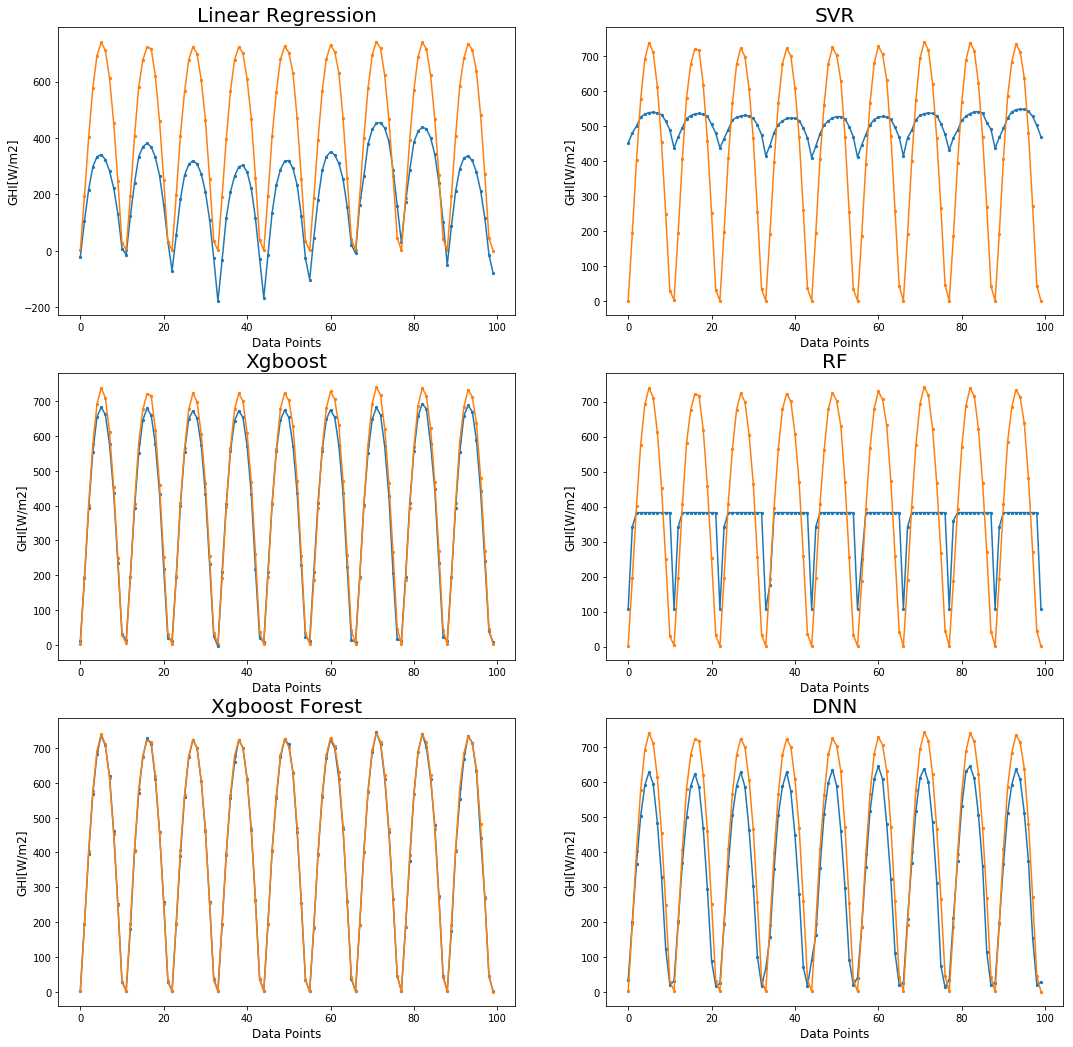

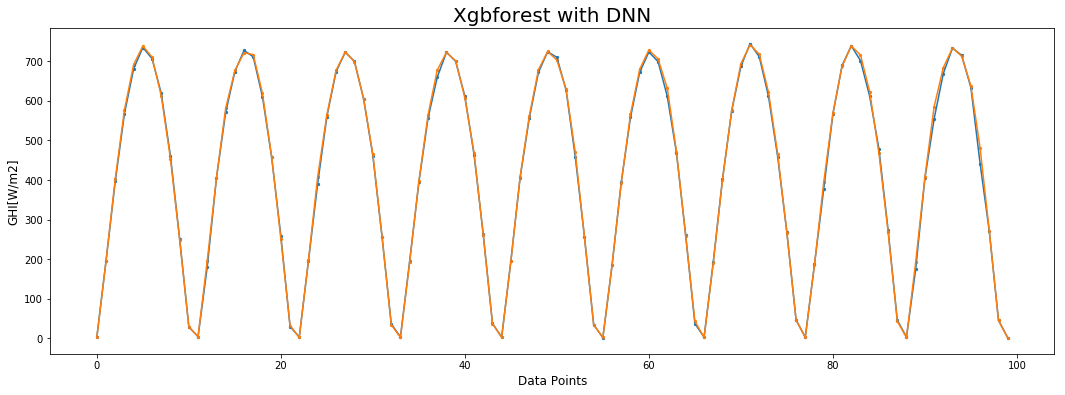

In [257]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(18,18))

ax[0,0].plot([x for x in range(100)],x_plot_linear_reg,linewidth=1.5)
ax[0,0].scatter([x for x in range(100)],x_plot_linear_reg,s=5)
ax[0,0].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[0,0].scatter([x for x in range(100)],y_time_plot,s=5)
ax[0,0].set_xlabel('Data Points', fontsize=12)
ax[0,0].set_ylabel('GHI[W/m2]', fontsize=12)
ax[0,0].set_title('Linear Regression', fontsize=20)

ax[0,1].plot([x for x in range(100)],x_plot_svr,linewidth=1.5)
ax[0,1].scatter([x for x in range(100)],x_plot_svr,s=5)
ax[0,1].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[0,1].scatter([x for x in range(100)],y_time_plot,s=5)
ax[0,1].set_xlabel('Data Points', fontsize=12)
ax[0,1].set_ylabel('GHI[W/m2]', fontsize=12)
ax[0,1].set_title('SVR', fontsize=20)

ax[1,1].plot([x for x in range(100)],x_plot_rf,linewidth=1.5)
ax[1,1].scatter([x for x in range(100)],x_plot_rf,s=5)
ax[1,1].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[1,1].scatter([x for x in range(100)],y_time_plot,s=5)
ax[1,1].set_xlabel('Data Points', fontsize=12)
ax[1,1].set_ylabel('GHI[W/m2]', fontsize=12)
ax[1,1].set_title('RF', fontsize=20)

ax[1,0].plot([x for x in range(100)],x_plot_xgb,linewidth=1.5)
ax[1,0].scatter([x for x in range(100)],x_plot_xgb,s=5)
ax[1,0].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[1,0].scatter([x for x in range(100)],y_time_plot,s=5)
ax[1,0].set_xlabel('Data Points', fontsize=12)
ax[1,0].set_ylabel('GHI[W/m2]', fontsize=12)
ax[1,0].set_title('Xgboost', fontsize=20)

ax[2,0].plot([x for x in range(100)],x_plot_xgb_forest,linewidth=1.5)
ax[2,0].scatter([x for x in range(100)],x_plot_xgb_forest,s=5)
ax[2,0].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[2,0].scatter([x for x in range(100)],y_time_plot,s=5)
ax[2,0].set_xlabel('Data Points', fontsize=12)
ax[2,0].set_ylabel('GHI[W/m2]', fontsize=12)
ax[2,0].set_title('Xgboost Forest', fontsize=20)

ax[2,1].plot([x for x in range(100)],x_plot_dnn_,linewidth=1.5)
ax[2,1].scatter([x for x in range(100)],x_plot_dnn_,s=5)
ax[2,1].plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax[2,1].scatter([x for x in range(100)],y_time_plot,s=5)
ax[2,1].set_xlabel('Data Points', fontsize=12)
ax[2,1].set_ylabel('GHI[W/m2]', fontsize=12)
ax[2,1].set_title('DNN', fontsize=20)


plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
fig.add_axes(label="shddbjch")
plt.show()


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,6))

ax.plot([x for x in range(100)],x_plot_xgb_dnn_forest,linewidth=1.5)
ax.scatter([x for x in range(100)],x_plot_xgb_dnn_forest,s=5)
ax.plot([x for x in range(100)],y_time_plot,linewidth=1.5)
ax.scatter([x for x in range(100)],y_time_plot,s=5)
ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('GHI[W/m2]', fontsize=12)
ax.set_title('Xgbforest with DNN', fontsize=20)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('GHI[W/m2]', fontsize=12)
fig.add_axes(label="shddbjch")
plt.show()